## Homework 2: Wine Quality Prediction Using SGD
### Editor: Seth Cram
### Course: CS 474/574: Deep Learning/2022 Fall
### Due: 09/25/2022


Add your code to the following sections:

    ## add your code here
    #-----------------------

    #---------------------------------
    
Description: In this homework, you are going to practice cross-validation and implement the stochastic gradient optimization (mini-batch) to solve the wine quality prediction problem. Using the following code as your template. Specific requirements:

1. Use all function definitions given in the code (e.g., def SGD(X, Y, lr = 0.001, batch_size = 32, epoch = 100):); and do not change the function names and input arguments. (deduct 5 points for doing this)

2. Evaluate (Cross-validation) the model trained using GD (20 points)

3. SGD implementation. 40 pts
   
4. Calculate and print out the MSE and MAE values of SGD for the training and test sets (15 points)
5. Plot the loss curve of the SGD. (5 points)
6. Plot the mse curves on the training and test sets using different models (w_hist). (20 points)

### Common mistakes
    
1. Call GD and SGD using the whole dataset

    -- GD and SGD are used to optimize the model (learn w); and we should call them using the training sets
   
2. Calculate gradient using the whole training set for SGD
    
    -- In SGD, update gradient only using mini-batches
  
3. Calculate the loss of each epoch using the average of all minibatches
    
    -- should use the w of the last mini-batch and the whole training set to calculate the loss  
   
4. Mix concepts of loss function and evaulation metrics
    -- loss function: for optimization purpose (gradient). We use the sum of square errors in this homework. L = 1/2 * sum(y_hat_i - y_i)^2
    
    -- evaluation metrics: mse and mae: mse = 1/m * sum(y_hat_i - y_i)^2, mae = 1/m * sum(abs(y_hat_i - y_i))

### 1. Load data, implement the model, loss function and GD 

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## (1) Data preparation
df=pd.read_csv('winequality-white.csv', sep = ';')
df
X = df.values[:, :11]
Y = df.values[:, 11]
print('Data shape:', 'X:', X.shape, 'Y:', Y.shape)

# data normalization
min_vals = np.min(X, axis = 0)
max_vals = np.max(X, axis = 0)
X1 = (X-min_vals)/(max_vals-min_vals)

##(2) Assume a linear mode that y = w0*1 + w_1*x_1 +w_2*x_2+...+ w_11*x_11
def predict(X, w):
    '''
    X: input feature vectors:m*n
    w: weights
    
    return Y_hat
    '''
    # Prediction
    Y_hat = np.zeros((X.shape[0]))
    for idx, x in enumerate(X):          
        y_hat = w[0] + np.dot(w[1:].T, np.c_[x]) # linear model
        Y_hat[idx] = y_hat    
    return Y_hat

## (3) Loss function: L = 1/2 * sum(y_hat_i - y_i)^2
def loss(w, X, Y):
    '''
    w: weights
    X: input feature vectors
    Y: targets
    '''
    Y_hat = predict(X, w)
    loss = 1/2* np.sum(np.square(Y - Y_hat))
    
    return loss

# Optimization 1: Gradient Descent
def GD(X, Y, lr = 0.001, delta = 0.01, max_iter = 100):
    '''
    X: training data
    Y: training target
    lr: learning rate
    max_iter: the max iterations
    '''
    
    m = len(Y)
    b = np.reshape(Y, [Y.shape[0],1])
    w = np.random.rand(X.shape[1] + 1, 1)
    A = np.c_[np.ones((m, 1)), X]
    gradient = A.T.dot(np.dot(A, w)-b)
    
    loss_hist = np.zeros(max_iter) # history of loss
    w_hist = np.zeros((max_iter, w.shape[0])) # history of weight
    loss_w = 0
    i = 0                  
    while(np.linalg.norm(gradient) > delta) and (i < max_iter):
        w_hist[i,:] = w.T
        loss_w = loss(w, X, Y)
        print(i, 'loss:', loss_w)
        loss_hist[i] = loss_w
        
        w = w - lr*gradient        
        gradient = A.T.dot(np.dot(A, w)-b) # update the gradient using new w
        i = i + 1
        
    w_star = w  
    return w_star, loss_hist, w_hist

Data shape: X: (4898, 11) Y: (4898,)


### 2. Model evaluation using cross-validation (20 points)

In [3]:
## 2.1 Split the dataset into training (70%) and test (30%) sets. (5 points)
from sklearn.model_selection import train_test_split

## add your code here
#-----------------------

#need to run above cell atleast once to get X1

#input dataset is X (should also split Y-resultant dataset to get training and test targets)

# data split of 70 training and 30 test
X_train, X_test, y_train, y_test = train_test_split(X1, Y, test_size=0.3)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)
#---------------------------------

(3428, 11) (1470, 11)
(3428,) (1470,)


In [4]:
## 2.2 Model training using the training set and the GD function (5 points )
## add your code here
#-----------------------

w_star, loss_hist, w_hist = GD(X_train, y_train)

print(w_star.shape, loss_hist.shape, w_hist.shape)

#---------------------------------

0 loss: 31039.828301026897
1 loss: 747079.1388106726
2 loss: 18718320.26520528
3 loss: 469736407.84269536
4 loss: 11788762349.895407
5 loss: 295857948002.578
6 loss: 7425031650693.167
7 loss: 186343127125300.12
8 loss: 4676580877415084.0
9 loss: 1.1736632866755728e+17
10 loss: 2.9454970342602127e+18
11 loss: 7.392199174441771e+19
12 loss: 1.8551914328558168e+21
13 loss: 4.655901675973882e+22
14 loss: 1.1684735080393802e+24
15 loss: 2.9324724489682594e+25
16 loss: 7.359511880065732e+26
17 loss: 1.84698802990919e+28
18 loss: 4.635313915136125e+29
19 loss: 1.1633066778949832e+31
20 loss: 2.9195054566122535e+32
21 loss: 7.326969124437684e+33
22 loss: 1.8388209012891432e+35
23 loss: 4.6148171905628364e+36
24 loss: 1.1581626947672772e+38
25 loss: 2.9065958025241035e+39
26 loss: 7.2945702684270525e+40
27 loss: 1.8306898865955646e+42
28 loss: 4.594411099704102e+43
29 loss: 1.1530414576298782e+45
30 loss: 2.893743233161829e+46
31 loss: 7.262314675729394e+47
32 loss: 1.8225948261376048e+49
33 lo

In [29]:
## 2.3. calculating mse&mae values on the training set and test set, respectively. (10 points)

#training error
## add your code here
#-----------------------

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

"""
def MSE(Y, Y_hat):
    Y_length = len(Y)
    Y_hat_length = len(Y_hat)
    
    #ensure same num of ellys for both target and prediction vals
    assert Y_length == Y_hat_length, "{} target values but only {} prediction values".format(Y_length, Y_hat_length)
    
    mse = 
    
    return mse
"""

#Values are way off:
# so maybe don't use w_star as wight??

y_train_prediction = predict(X_train, w_star)

#w_star = last elly of every w_hist
# the resultant prediction from that GD run

#mse_train = mean_squared_error(y_true=y_train, y_pred=w_star )
mse_train = mean_squared_error(y_true=y_train, y_pred=y_train_prediction )
mae_train = mean_absolute_error(y_true=y_train, y_pred=y_train_prediction )

print('training mse: {} and training mae:{}'.format(mse_train, mae_train))
#---------------------------------


## test error
## add your code here
#-----------------------

y_test_prediction = predict(X_test, w_star)

mse_test = mean_squared_error(y_true=y_test, y_pred=y_test_prediction )
mae_test = mean_absolute_error(y_true=y_test, y_pred=y_test_prediction )

print('test mse: {} and test mae:{}'.format(mse_test, mae_test))
#---------------------------------

training mse: 1.5867338463670562e+141 and training mae:3.976153775443393e+70


ValueError: operands could not be broadcast together with shapes (1470,11) (12,1) 

### 3. SGD implementation (40 points)
Use the SGD function definition given in the code (def SGD(X, Y, lr = 0.001, batch_size = 32, epoch = 100):); and do not change it.

In [20]:
from sklearn.utils import shuffle

def SGD(X, Y, lr = 0.001, batch_size = 32, epoch = 100): 
    '''Implement the minibatch Gradient Desent approach
    
        X: training data
        Y: training target
        lr: learning rate
        batch_size: batch size
        epoch: number of max epoches
        
        return: w_star, w_hist, loss_hist
    '''
    m = len(Y)
    np.random.seed(9)
    w = np.random.rand(X.shape[1]+1, 1)    #(12,1) values in [0, 1)
    w_hist = np.zeros((epoch, w.shape[0])) # (epoch,12) 
    loss_hist = np.zeros(epoch)            # (epoch,)
   
    
    ## add your code here
    #-----------------------
    for i in range(epoch):
        #(1) Shuffle data (X and Y) at the beginning of each epoch. (5 points)
        Xshuffled = shuffle(X)
        Yshuffled = shuffle(Y)
        
        #(2) go through all minibatches and update w. (30 points)
        for b in range(int(m/batch_size)): 
            # prepare the b mininath X_batch and Y_batch. 10 points
            
            #excludes data that didn't fit in a batch on the end of X and Y
            
            batchPrevCutoffIndex = batch_size * b
            batchCurrCutoffIndex = batch_size * (b+1)
            
            #print("Batch number is {} and the highest batch number is {}.".format(b, int(m/batch_size)-1))
            
            #separate shuffled data into batches at the cutoff points within the data
            X_batch = Xshuffled[batchPrevCutoffIndex:batchCurrCutoffIndex]
            Y_batch = Yshuffled[batchPrevCutoffIndex:batchCurrCutoffIndex]
            
            #prepare A_batch and b_batch. 10 points

            A_batch = np.c_[np.ones((batch_size, 1)), X_batch]
            b_batch = np.reshape(Y_batch, [Y_batch.shape[0],1])
            
            #gradient calcualation and w update. 10 points
            gradient = A_batch.T.dot(np.dot(A_batch, w)-b_batch) # update the gradient using new w and only batches
            w = w - lr*gradient        
            
            #print(i, b, X_batch.shape, A_batch.shape)

            
            
        ## (3) Save the loss and current weight for each epoch. 5 points
        w_hist[i,:] = w.T
        #use the w of the last mini-batch and whole training set to calc loss
        loss_w = loss(w, X, Y)
        #print(i, 'loss:', loss_w)
        loss_hist[i] = loss_w
        
        #print(i, loss_hist[i])
        
        ##(4) Decay learning rate at the end of each epoch. 
        lr = lr * 0.9
    #---------------------------------
    
    w_star = w
    return w_star, w_hist, loss_hist  

### 4. Calculate and print out the MSE and MAE values of SGD for the training and test sets (15 points)

In [30]:
batch_size = 32
n_epochs = 50

#train model using SGD
w_star_SGD, w_hist_SGD, loss_hist_SGD = SGD(X_train, y_train, lr = 0.0001, batch_size = batch_size, epoch = n_epochs)

## add your code here
#-----------------------
#(1) print out the predicted wine quality values and the true quality 
# values of the first 10 data samples in the test dataset.  5 points

y_test_prediction = predict(X_test, w_star)

for i in range(0, 10):
    #print("Predicted wine value = {}, true wine value = {}".format(w_hist_SGD[i],w_star_SGD[i])) 
    #why is it 12 prediction vals for every 1 true val?
    print("Predicted wine value = {}, true wine value = {}".format(y_test_prediction, y_test))


#(2) mse and mae of the training set. 5 points

y_train_prediction = predict(X_train, w_star)

mse_train = mean_squared_error(y_true=y_train, y_pred=y_train_prediction )
mae_train = mean_absolute_error(y_true=y_train, y_pred=y_train_prediction )


#(3)mse and mae of the test set. 5 points

mse_test = mean_squared_error(y_true=y_test, y_pred=y_test_prediction )
mae_test = mean_absolute_error(y_true=y_test, y_pred=y_test_prediction )

#---------------------------------

0 loss: 13503.096160735444
1 loss: 5446.7423419938805
2 loss: 2858.304064508651
3 loss: 1933.865062735598
4 loss: 1573.641765139685
5 loss: 1419.9593512344945
6 loss: 1349.5845296902366
7 loss: 1313.7443755698246
8 loss: 1295.1208919822848
9 loss: 1284.85821050549
10 loss: 1278.8074286352228
11 loss: 1275.0165978930509
12 loss: 1272.680182074274
13 loss: 1271.1228483228158
14 loss: 1270.0318607241834
15 loss: 1269.3711793620732
16 loss: 1268.860941991586
17 loss: 1268.490650827181
18 loss: 1268.2507442438064
19 loss: 1268.095787119973
20 loss: 1267.9527497461231
21 loss: 1267.8697135818525
22 loss: 1267.7988186244472
23 loss: 1267.7542194975601
24 loss: 1267.730017887076
25 loss: 1267.6916734545134
26 loss: 1267.671509591361
27 loss: 1267.6582205023474
28 loss: 1267.6483092892795
29 loss: 1267.6363718875218
30 loss: 1267.6353452699902
31 loss: 1267.6177260103982
32 loss: 1267.6171298123277
33 loss: 1267.615934226963
34 loss: 1267.610129388233
35 loss: 1267.6083604712996
36 loss: 1267.6

### 5. Plot the loss curve of the SGD. (5 points)

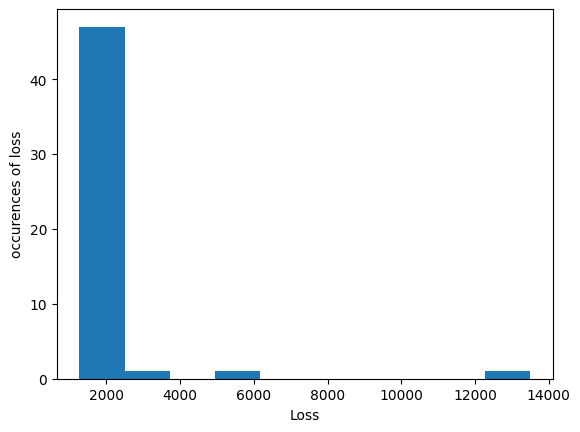

In [32]:
## add your code here
#-----------------------

plt.hist(loss_hist_SGD)
plt.xlabel('Loss')
plt.ylabel('Occurences of loss')
plt.show()

#---------------------------------

### 6. Plot the mse curves on the training and test sets using different models (w_hist). (20 points)

In [ ]:
mse_SGD_train=np.zeros(n_epochs)
mse_SGD_test=np.zeros(n_epochs)

## add your code here
#-----------------------









#---------------------------------